In [1]:
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
import emoji


In [51]:
review_df=pd.read_csv("hospital_review_sent.csv", index_col=[0])

In [52]:
review_df.head()

star                                     review_content   
0     5  In for a minor operation. Not long to wait bef...  \
1     5  Fantastic team at York stroke clinic really lo...   
2     5  Huge thanks to the opthalmology team on this m...   
3     1                  Underfunded by the Conservatives.   
4     5                              Good experience in ED   

                                 review_preprocessed  word_count  char_count   
0  minor operation not long wait operation care s...          30         175  \
1  fantastic team york stroke clinic really looke...          61         348   
2              huge thanks opthalmology team morning           9          52   
3                           underfunded conservative           4          33   
4                                 good experience ed           4          21   

   emoji_count  vader_result_c  bert_result  
0            0          0.6240     0.951596  
1            0          0.9423     0.999813  
2            0          0.6369     0.999368  
3            0          0.0000    -0.997657  
4            0          0.4404     0.999857

In [53]:
review_df.isna().sum()

star                   0
review_content         0
review_preprocessed    0
word_count             0
char_count             0
emoji_count            0
vader_result_c         0
bert_result            0
dtype: int64

### Prediction for review ratings (catboost regressor)

In [54]:
train_df, test_df = train_test_split(review_df, test_size = 0.2, random_state=1)

In [55]:
vectorizer =TfidfVectorizer(max_features=75,ngram_range=(1,3))
train_vectorized_data=vectorizer.fit_transform(train_df['review_preprocessed'])
test_vectorized_data = vectorizer.transform(test_df['review_preprocessed'])

In [56]:
def merge_vectorized_data(vectorized_data, df):
    vec_data_df = pd.DataFrame(vectorized_data.toarray(), columns = vectorizer.get_feature_names_out())
    vec_data_df.index = df['review_content']
    vec_data_df = vec_data_df.reset_index()
    df = df.merge(vec_data_df, how='left', on="review_content")
    return df

In [57]:
train_vectorized_df = merge_vectorized_data(train_vectorized_data, train_df)
test_vectorized_df = merge_vectorized_data(test_vectorized_data, test_df)

In [58]:
train_vectorized_df.head(5)

star                                     review_content   
0     5                       Always worth 6 stars. Great.  \
1     5  I was given an epidural by dr hall of the day ...   
2     5  Have been to a lot of hospital in my time and ...   
3     5  From the ambulance to ward 22, everything was ...   
4     4  Friendly and efficient medical staff make your...   

                                 review_preprocessed  word_count  char_count   
0                          always worth 6 star great           5          28  \
1  given epidural doctor hall day unit felt littl...          43         223   
2  lot hospital time week ward life opinion good ...          28         124   
3  ambulance ward 22 everything 5 treatment nurse...          26         150   
4  friendly efficient medical staff make visit be...          10          65   

   emoji_count  vader_result_c  bert_result  absolutely  also  ...  wait   
0            0          0.7184     0.999890         0.0   0.0  ...   0.0  \
1            0          0.7571    -0.831110         0.0   0.0  ...   0.0   
2            0          0.4404     0.999184         0.0   0.0  ...   0.0   
3            0          0.2280     0.996488         0.0   0.0  ...   0.0   
4            0          0.8360     0.999516         0.0   0.0  ...   0.0   

       ward      week  well  went  work   working  would      york   
0  0.000000  0.000000   0.0   0.0   0.0  0.000000    0.0  0.000000  \
1  0.000000  0.000000   0.0   0.0   0.0  0.000000    0.0  0.288187   
2  0.368534  0.457849   0.0   0.0   0.0  0.000000    0.0  0.000000   
3  0.364306  0.000000   0.0   0.0   0.0  0.452595    0.0  0.000000   
4  0.000000  0.000000   0.0   0.0   0.0  0.000000    0.0  0.000000   

   york hospital  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  

[5 rows x 83 columns]

In [59]:
test_vectorized_df.head(5)

star                                     review_content   
0     3  This hospital is pushed to limit I’ve had a ma...  \
1     3  Customer care in Head and Neck department was ...   
2     5  Covid precautions in place and sanitizers all ...   
3     5  I visited the urgent care unit of A&E and was ...   
4     5  My hubby harold edward prew was in ward 26 for...   

                                 review_preprocessed  word_count  char_count   
0  hospital pushed limit ’ major operation staff ...          99         486  \
1  customer care head neck department lacking app...         116         643   
2  covid precaution place sanitizers plenty sign ...          18         108   
3  visited urgent care unit e impressed kindness ...          45         230   
4  hubby harold edward prew ward 26 week beatiful...          28         143   

   emoji_count  vader_result_c  bert_result  absolutely  also  ...      wait   
0            0         -0.1386    -0.943648         0.0   0.0  ...  0.216997  \
1            0          0.3716    -0.999053         0.0   0.0  ...  0.197180   
2            0          0.3400    -0.955843         0.0   0.0  ...  0.000000   
3            0          0.9106     0.999778         0.0   0.0  ...  0.259578   
4            0          0.8176     0.998772         0.0   0.0  ...  0.000000   

       ward      week      well  went  work  working  would  york   
0  0.239503  0.000000  0.000000   0.0   0.0      0.0    0.0   0.0  \
1  0.000000  0.000000  0.000000   0.0   0.0      0.0    0.0   0.0   
2  0.000000  0.000000  0.000000   0.0   0.0      0.0    0.0   0.0   
3  0.000000  0.000000  0.000000   0.0   0.0      0.0    0.0   0.0   
4  0.377202  0.468617  0.427159   0.0   0.0      0.0    0.0   0.0   

   york hospital  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  

[5 rows x 83 columns]

In [82]:
X_train= train_vectorized_df.iloc[:,3:]
X_test = test_vectorized_df.iloc[:,3:]
y_train = train_vectorized_df['star']
y_test= test_vectorized_df['star']

In [84]:
model = cb.CatBoostRegressor()

In [85]:
model.fit(X_train, y_train)

Learning rate set to 0.03077
0:	learn: 1.4980499	total: 5.32ms	remaining: 5.32s
1:	learn: 1.4723092	total: 10.9ms	remaining: 5.42s
2:	learn: 1.4490092	total: 16.9ms	remaining: 5.63s
3:	learn: 1.4277815	total: 21.9ms	remaining: 5.45s
4:	learn: 1.4074370	total: 28.3ms	remaining: 5.64s
5:	learn: 1.3865318	total: 33.3ms	remaining: 5.52s
6:	learn: 1.3653390	total: 37.5ms	remaining: 5.32s
7:	learn: 1.3430762	total: 44.4ms	remaining: 5.5s
8:	learn: 1.3231339	total: 48.8ms	remaining: 5.37s
9:	learn: 1.3011818	total: 53.4ms	remaining: 5.29s
10:	learn: 1.2841247	total: 58.8ms	remaining: 5.29s
11:	learn: 1.2631637	total: 63ms	remaining: 5.19s
12:	learn: 1.2487124	total: 67.9ms	remaining: 5.15s
13:	learn: 1.2320832	total: 72.9ms	remaining: 5.14s
14:	learn: 1.2169135	total: 78.2ms	remaining: 5.14s
15:	learn: 1.1997074	total: 82.9ms	remaining: 5.1s
16:	learn: 1.1866784	total: 87.7ms	remaining: 5.07s
17:	learn: 1.1732772	total: 94.5ms	remaining: 5.16s
18:	learn: 1.1574987	total: 98.9ms	remaining: 5.1

In [86]:

y_pred=model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print('mae: {:.2f}'.format(mae))
print('MSE: {:.2f}'.format(mse))
print('RMSE: {:.2f}'.format(rmse))
print('R2 Score: {:.2f}'.format(r2))

mae: 0.38
MSE: 0.40
RMSE: 0.63
R2 Score: 0.77


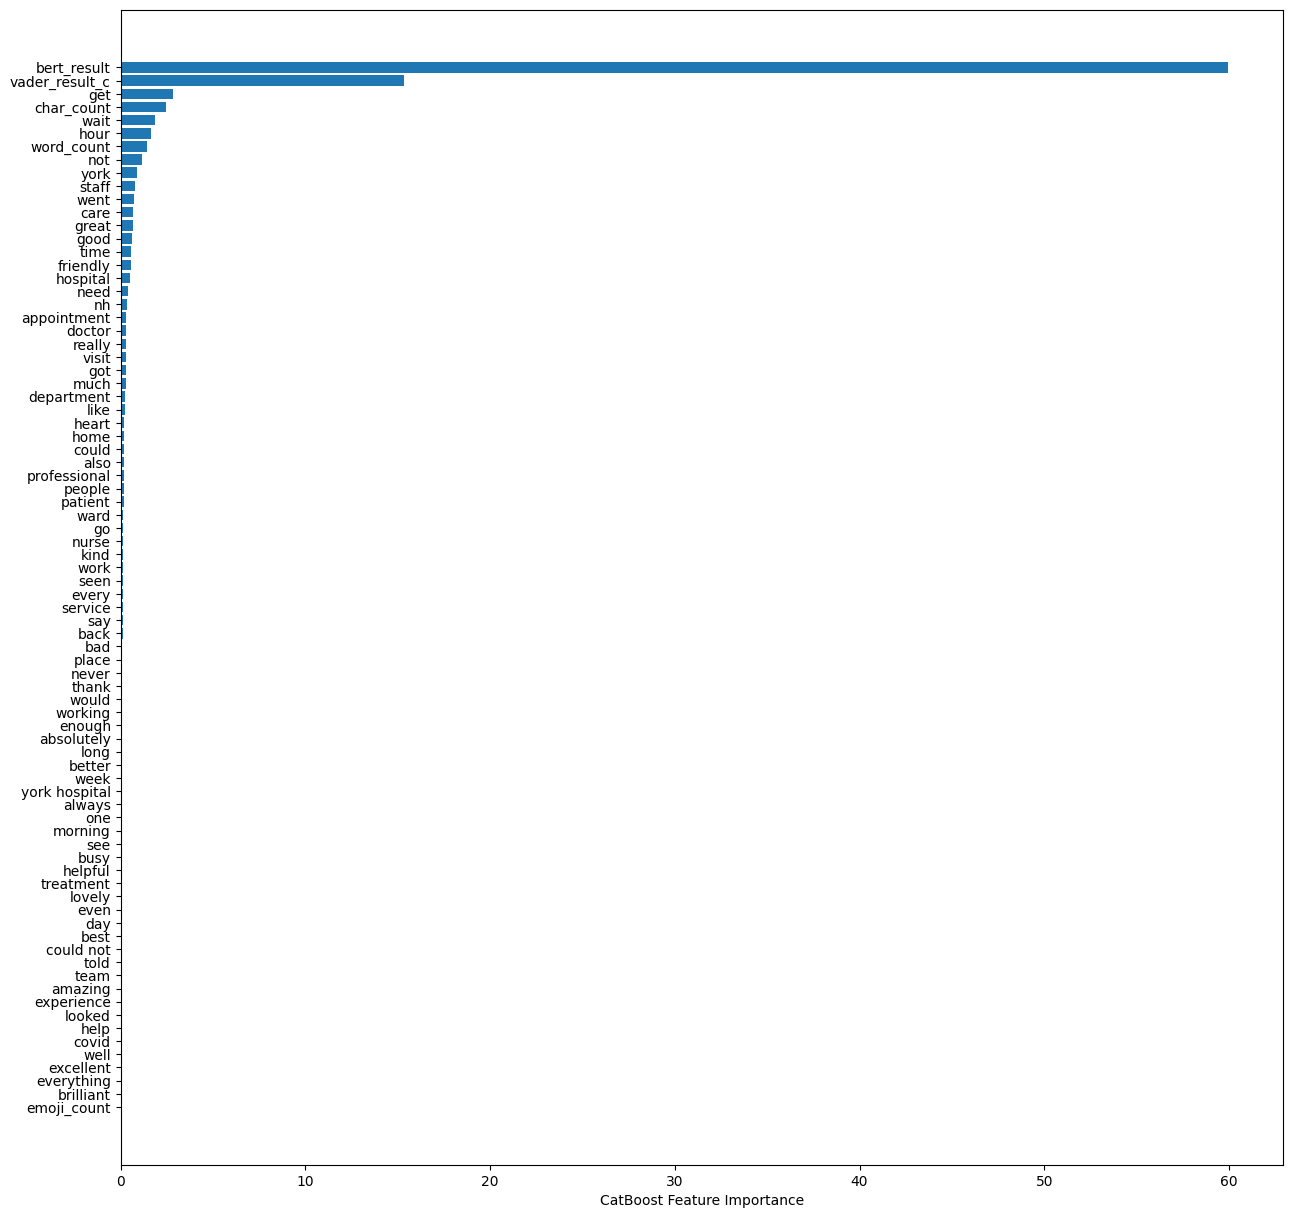

In [87]:
plt.figure(figsize =(15,15))
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance])
plt.xlabel("CatBoost Feature Importance");

#### Parameter Tuning 1

In [93]:
model = cb.CatBoostRegressor()

In [94]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, X_train, y_train)

0:	learn: 4.1930267	test: 4.3775670	best: 4.3775670 (0)	total: 1.31ms	remaining: 130ms
1:	learn: 4.0836430	test: 4.2696222	best: 4.2696222 (1)	total: 3.55ms	remaining: 174ms
2:	learn: 3.9797015	test: 4.1631600	best: 4.1631600 (2)	total: 4.66ms	remaining: 151ms
3:	learn: 3.8787857	test: 4.0586363	best: 4.0586363 (3)	total: 5.72ms	remaining: 137ms
4:	learn: 3.7813140	test: 3.9573610	best: 3.9573610 (4)	total: 6.75ms	remaining: 128ms
5:	learn: 3.6855280	test: 3.8579765	best: 3.8579765 (5)	total: 7.65ms	remaining: 120ms
6:	learn: 3.5952430	test: 3.7637997	best: 3.7637997 (6)	total: 8.54ms	remaining: 113ms
7:	learn: 3.5079042	test: 3.6750016	best: 3.6750016 (7)	total: 9.66ms	remaining: 111ms
8:	learn: 3.4235679	test: 3.5861606	best: 3.5861606 (8)	total: 10.5ms	remaining: 106ms
9:	learn: 3.3422359	test: 3.5007515	best: 3.5007515 (9)	total: 11.2ms	remaining: 101ms
10:	learn: 3.2626236	test: 3.4181279	best: 3.4181279 (10)	total: 12ms	remaining: 96.8ms
11:	learn: 3.1843579	test: 3.3347822	best:

{'params': {'depth': 4,
  'iterations': 200,
  'learning_rate': 0.03,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               

In [95]:
y_pred=model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print('mae: {:.2f}'.format(mae))
print('MSE: {:.2f}'.format(mse))
print('RMSE: {:.2f}'.format(rmse))
print('R2 Score: {:.2f}'.format(r2))

mae: 0.39
MSE: 0.43
RMSE: 0.66
R2 Score: 0.75


Text(0.5, 0, 'CatBoost Feature Importance')

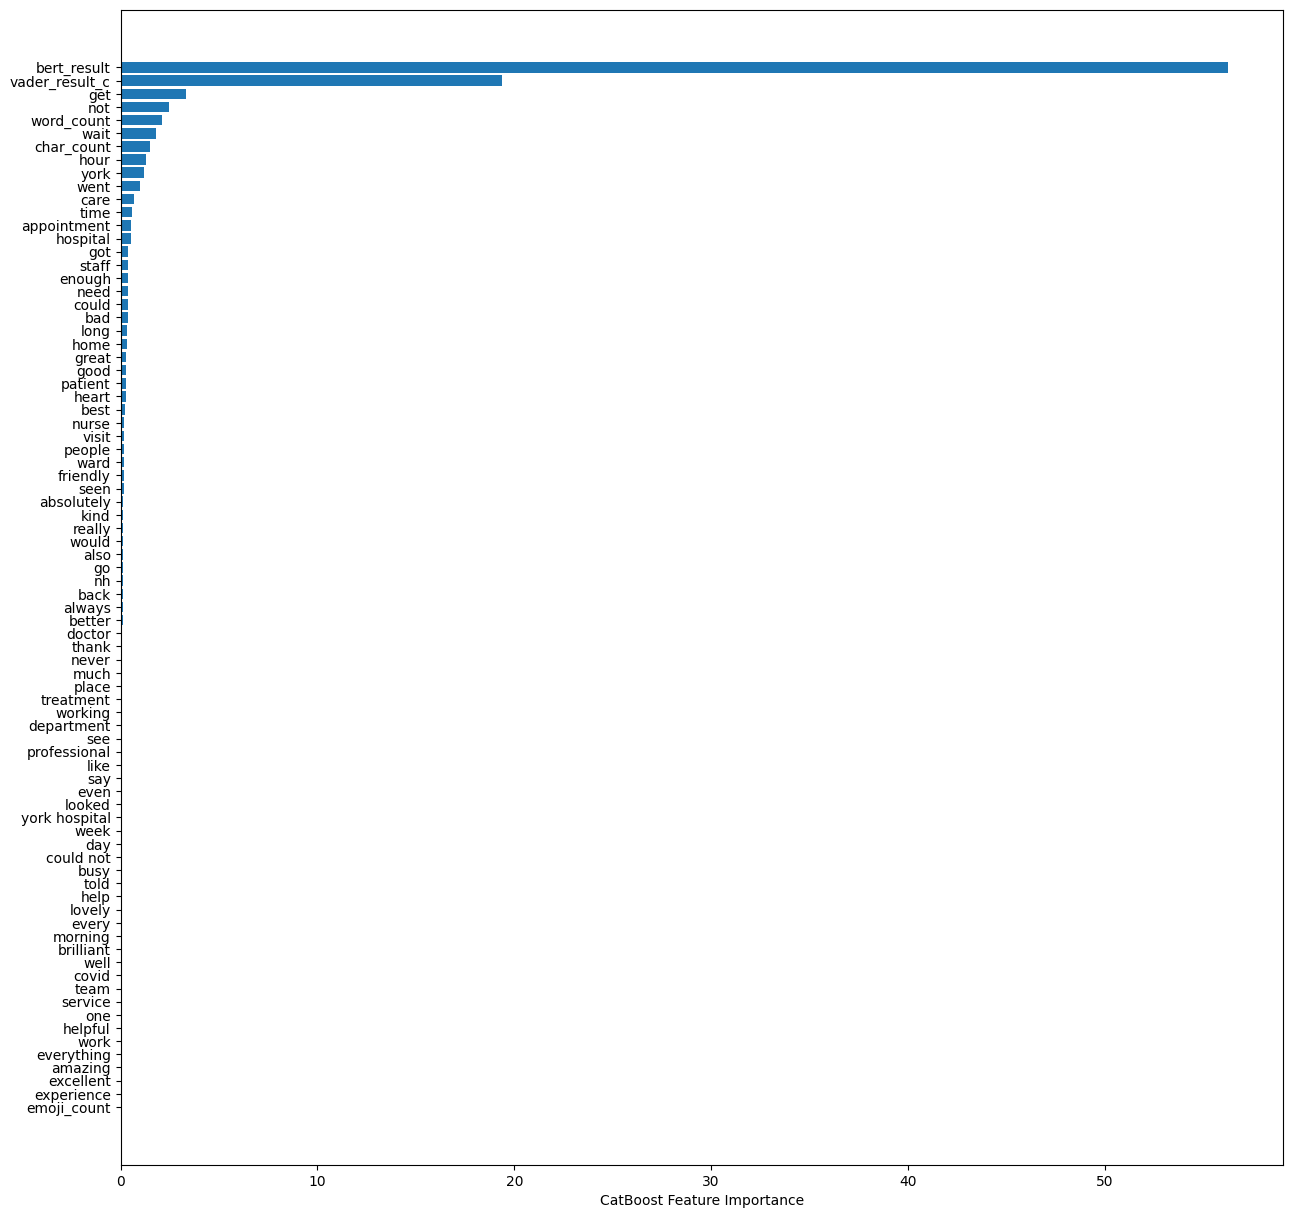

In [96]:
plt.figure(figsize =(15,15))
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance])
plt.xlabel("CatBoost Feature Importance")

#### Parameter Tuning 2

In [97]:
model = cb.CatBoostRegressor()

In [98]:
grid = {'iterations': [75, 120, 200],
        'learning_rate': [0.02, 0.1, 0.2],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.1, 0.5, 1, 3]}
model.grid_search(grid, X_train, y_train)

0:	learn: 4.2299031	test: 4.4157592	best: 4.4157592 (0)	total: 1.59ms	remaining: 118ms
1:	learn: 4.1559043	test: 4.3428425	best: 4.3428425 (1)	total: 2.9ms	remaining: 106ms
2:	learn: 4.0847324	test: 4.2701900	best: 4.2701900 (2)	total: 3.87ms	remaining: 92.9ms
3:	learn: 4.0149082	test: 4.1980829	best: 4.1980829 (3)	total: 4.72ms	remaining: 83.7ms
4:	learn: 3.9466126	test: 4.1271809	best: 4.1271809 (4)	total: 5.48ms	remaining: 76.7ms
5:	learn: 3.8787600	test: 4.0569439	best: 4.0569439 (5)	total: 6.18ms	remaining: 71.1ms
6:	learn: 3.8138662	test: 3.9900374	best: 3.9900374 (6)	total: 6.9ms	remaining: 67ms
7:	learn: 3.7504028	test: 3.9258448	best: 3.9258448 (7)	total: 7.57ms	remaining: 63.4ms
8:	learn: 3.6883722	test: 3.8609051	best: 3.8609051 (8)	total: 8.23ms	remaining: 60.4ms
9:	learn: 3.6275237	test: 3.7972083	best: 3.7972083 (9)	total: 8.89ms	remaining: 57.8ms
10:	learn: 3.5675768	test: 3.7354846	best: 3.7354846 (10)	total: 9.56ms	remaining: 55.6ms
11:	learn: 3.5092064	test: 3.6754701

{'params': {'depth': 4,
  'l2_leaf_reg': 3,
  'iterations': 75,
  'learning_rate': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,


In [99]:
y_pred=model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print('mae: {:.2f}'.format(mae))
print('MSE: {:.2f}'.format(mse))
print('RMSE: {:.2f}'.format(rmse))
print('R2 Score: {:.2f}'.format(r2))

mae: 0.34
MSE: 0.35
RMSE: 0.59
R2 Score: 0.80


Text(0.5, 0, 'CatBoost Feature Importance')

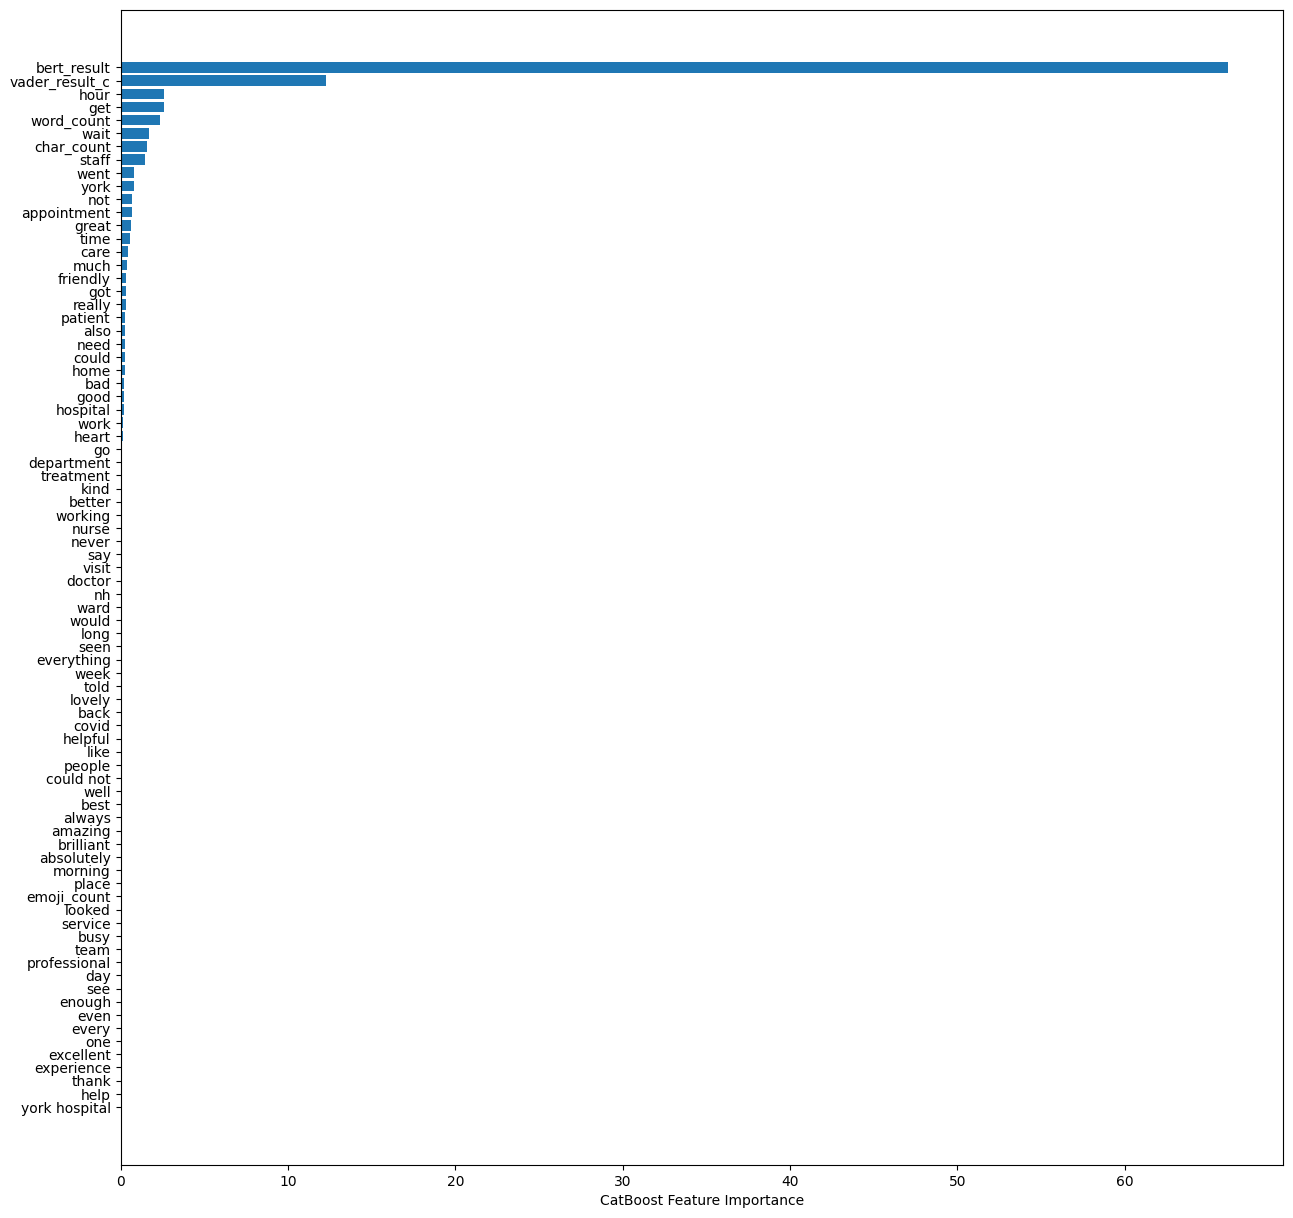

In [100]:
plt.figure(figsize =(15,15))
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance])
plt.xlabel("CatBoost Feature Importance")

#### Parameter Tuning 3

In [55]:
model = cb.CatBoostRegressor()


In [56]:
grid = {'iterations': [75, 120, 200],
        'learning_rate': [0.03, 0.07, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, X_train, y_train)

0:	learn: 4.1668706	test: 4.4117352	best: 4.4117352 (0)	total: 1.39ms	remaining: 103ms
1:	learn: 4.0597789	test: 4.2980158	best: 4.2980158 (1)	total: 2.82ms	remaining: 103ms
2:	learn: 3.9552030	test: 4.1881371	best: 4.1881371 (2)	total: 3.66ms	remaining: 87.9ms
3:	learn: 3.8561457	test: 4.0848101	best: 4.0848101 (3)	total: 4.51ms	remaining: 80ms
4:	learn: 3.7605892	test: 3.9837646	best: 3.9837646 (4)	total: 5.42ms	remaining: 75.8ms
5:	learn: 3.6680865	test: 3.8855997	best: 3.8855997 (5)	total: 6.29ms	remaining: 72.4ms
6:	learn: 3.5787426	test: 3.7910315	best: 3.7910315 (6)	total: 7.18ms	remaining: 69.7ms
7:	learn: 3.4903426	test: 3.6964308	best: 3.6964308 (7)	total: 8.06ms	remaining: 67.5ms
8:	learn: 3.4058031	test: 3.6050187	best: 3.6050187 (8)	total: 8.96ms	remaining: 65.7ms
9:	learn: 3.3260067	test: 3.5202801	best: 3.5202801 (9)	total: 9.88ms	remaining: 64.2ms
10:	learn: 3.2488489	test: 3.4374258	best: 3.4374258 (10)	total: 11ms	remaining: 63.9ms
11:	learn: 3.1727728	test: 3.3577002

{'params': {'depth': 4,
  'l2_leaf_reg': 1,
  'iterations': 75,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,


In [57]:
y_pred=model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print('mae: {:.2f}'.format(mae))
print('MSE: {:.2f}'.format(mse))
print('RMSE: {:.2f}'.format(rmse))
print('R2 Score: {:.2f}'.format(r2))

mae: 0.46
MSE: 0.42
RMSE: 0.65
R2 Score: 0.74


Reference
https://towardsdatascience.com/catboost-regression-in-6-minutes-3487f3e5b329